In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df = web.DataReader("RELIANCE.NS",data_source="yahoo", start="2010-01-01", end='2020-11-13')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,545.549988,510.924988,545.549988,537.750000,35040012.0,457.306488
2010-01-05,574.950012,532.700012,574.950012,535.349976,9780080.0,455.265503
2010-01-06,547.250000,535.325012,539.950012,544.000000,10831076.0,462.621460
2010-01-07,557.500000,539.000000,544.000000,553.025024,11976808.0,470.296417
2010-01-08,556.900024,548.000000,554.000000,551.575012,6907852.0,469.063354
...,...,...,...,...,...,...
2020-11-09,2069.000000,2036.000000,2062.100098,2050.699951,16539467.0,2050.699951
2020-11-10,2090.000000,2041.199951,2077.000000,2084.550049,17045147.0,2084.550049
2020-11-11,2095.000000,1978.099976,2089.000000,1997.199951,26178477.0,1997.199951


In [3]:
df.shape

(2680, 6)

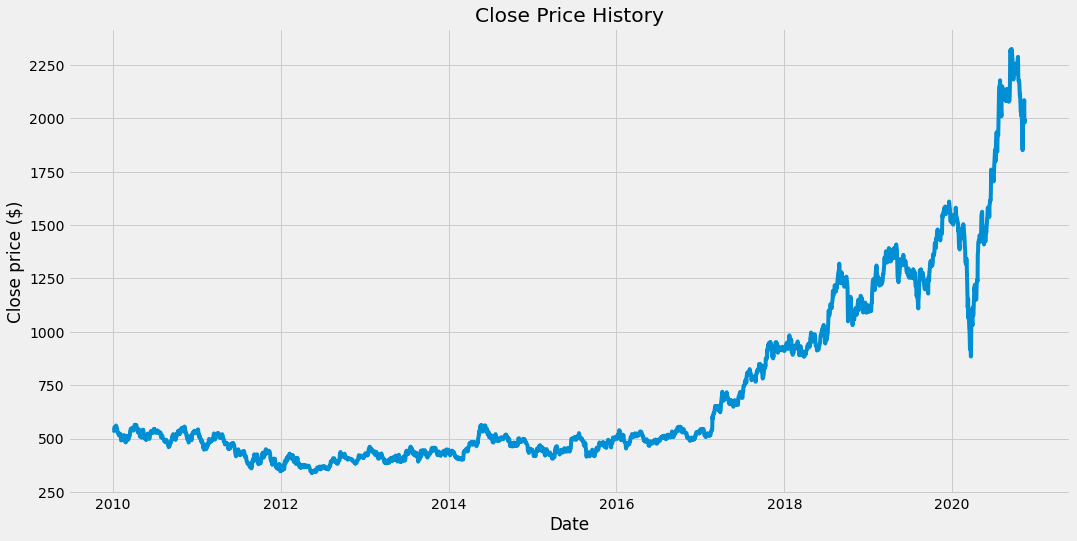

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close price ($)')
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len 

2144

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.10052857],
       [0.0993204 ],
       [0.10367481],
       ...,
       [0.83521264],
       [0.82655422],
       [0.83480996]])

In [7]:
train_data = scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [8]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [9]:
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2084, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'

In [39]:
model.compile(optimizer="adam", loss='mean_squared_error')

In [40]:
model.fit(x_train,y_train, batch_size=1,epochs=1)

2084/2084 [==============================] - 47s 23ms/step - loss: 3.3457e-04


In [42]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len : , :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [43]:
x_test = np.array(x_test)

In [44]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [45]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)


In [52]:
rmse=np.sqrt(np.mean(((prediction - y_test)**2)))
rmse

68.20137671528654

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

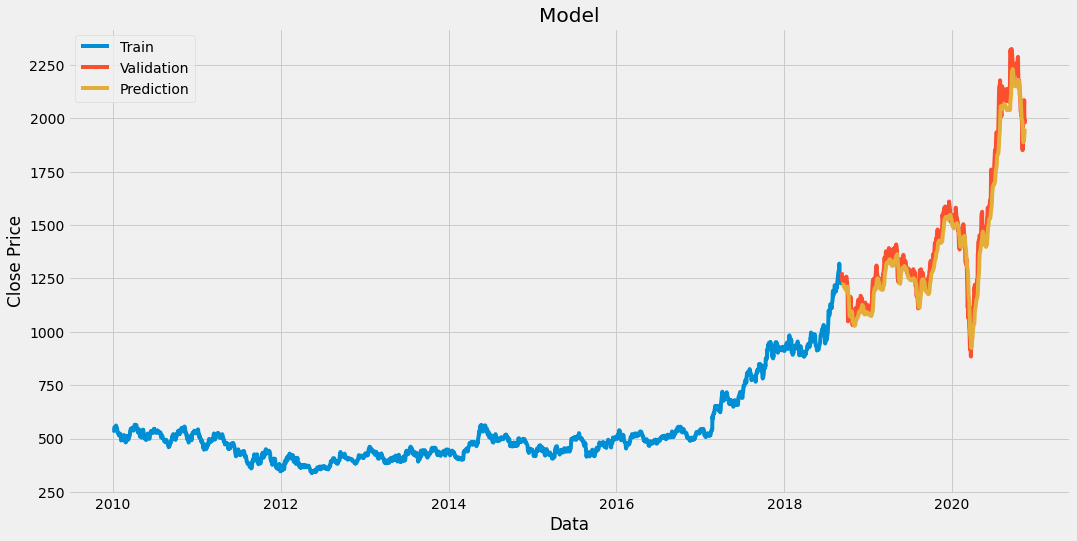

In [58]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = prediction

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Validation','Prediction'])
plt.show

In [59]:
valid

,Close,Prediction
Date,,
2018-09-07,1278.599976,1221.146484
2018-09-10,1255.849976,1221.837402
2018-09-11,1237.699951,1222.488892
2018-09-12,1252.500000,1220.812012
2018-09-14,1253.150024,1220.093750
...,...,...
2020-11-09,2050.699951,1892.279419
2020-11-10,2084.550049,1908.358765
2020-11-11,1997.199951,1932.756714


In [65]:
reliance_quote = web.DataReader('RELIANCE.NS',data_source='yahoo',start='2010-01-01',end='2020-11-12')
new_df = reliance_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1954.3726]]


In [67]:
reliance_quote2 = web.DataReader('RELIANCE.NS',data_source='yahoo',start='2010-01-01',end='2020-11-13')
print(reliance_quote2['Close'])

Date
2010-01-04     537.750000
2010-01-05     535.349976
2010-01-06     544.000000
2010-01-07     553.025024
2010-01-08     551.575012
                 ...     
2020-11-09    2050.699951
2020-11-10    2084.550049
2020-11-11    1997.199951
2020-11-12    1980.000000
2020-11-13    1996.400024
Name: Close, Length: 2680, dtype: float64
